# Working With MNIST Dataset

In [212]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance
import functools
import operator

In [213]:
#loading data
(x_train, y_train, x_test, y_test)=torch.load('mnist.pt')

In [214]:
#making 28*28 dimension image to 1*784 dimension feature vector
X_train = []
for data_point in x_train:
    X_train.append(data_point.view(1,-1)[0])
    
X_test = []

for data_point in x_test:
    X_test.append(data_point.view(1,-1)[0])

In [215]:
print(len(X_train[0]))

784


In [216]:
#finding euclidean distance between 2 tensors

def euclideanDistance(instance1,instance2):
    return distance.euclidean(instance1.numpy(),instance2.numpy())

In [217]:
# comparator which will be  useful for sorting neighbors 
def mycmp(i1,i2):
    if i1[1]<i2[1]:
        return -1
    elif i1[1]>i2[1]:
        return 1
    else:
        if i1[3]<i2[3]:
            return -1
        else:
            return 1
        

In [218]:

# finding k nearest neighbors in the form of tuples eaach tuple is of the form (data point,distance, label,index)

def neighbors(training_set,test_instance,k,training_labels):
    distances = []
    
    for i in range(len(training_set)):
        dist = euclideanDistance(training_set[i],test_instance)
        distances.append((training_set[i],dist,training_labels[i],i))

    distances = sorted(distances,key=functools.cmp_to_key(mycmp))
    neighbors_list = []
    for i in range(k):
        neighbors_list.append(distances[i])
        
    return neighbors_list
    

In [219]:
# finding label for test instance according majority votes of neighbors

def response(neighbors_list):
    classVotes = {}
    for i in range(len(neighbors_list)):
        resp = neighbors_list[i][2]
        if resp.item() in classVotes:
            classVotes[resp.item()]+=1
        else:
            classVotes[resp.item()] = 1
    
    sortedVotes = sorted(classVotes.items(),key=operator.itemgetter(1),reverse=True)
    return sortedVotes[0][0]
    

In [220]:
def mycmp2(v1,v2):
    if v1[0]<v2[0]:
        return -1
    elif v1[0]>v2[0]:
        return 1
    else:
        if v1[1]<v2[1]:
            return 1
        else:
            return -1
        
    

In [221]:
# finding label for test instance according majority votes of neighbors
import operator
def response2(neighbors_list):
    classVotes = {}
    for i in range(len(neighbors_list)):
        resp = neighbors_list[i][2]
        if resp.item() in classVotes:
            classVotes[resp.item()][0]+=1
            if classVotes[resp.item()][1]>neighbors_list[i][3]:
                classVotes[resp.item()][1]=neighbors_list[i][3]
            
        else:
            classVotes[resp.item()] = (1,neighbors_list[i][3])
    
    sortedVotes = sorted(classVotes.items(),key=functools.cmp_to_key(mycmp2),reverse=True)
    return sortedVotes[0][0]

In [222]:
k = input("Enter the Value of K:")

Enter the Value of K:3


In [223]:

#predicting labels for each test instance
predictions = []
for i in range(len(X_test)):
    neighbors_list = neighbors(X_train,X_test[i],int(k),y_train)
    result = response(neighbors_list)
    predictions.append(result)

In [224]:
#list of predictions
print(predictions)

[7, 1, 1, 1, 4, 1, 8, 1, 1, 9, 1, 1, 1, 1, 1, 1, 9, 7, 1, 4, 1, 1, 1, 1, 1, 1, 7, 4, 0, 1, 1, 1, 1, 8, 1, 1, 7, 1, 1, 1, 1, 7, 1, 1, 1, 1, 1, 1, 1, 4, 6, 1, 1, 5, 1, 1, 8, 1, 9, 1, 1, 1, 1, 1, 7, 1, 1, 4, 1, 1, 7, 1, 1, 1, 1, 1, 1, 7, 1, 7, 9, 1, 1, 9, 1, 1, 7, 1, 1, 1, 1, 1, 9, 1, 1, 1, 1, 1, 6, 1]


In [225]:
#list of original labels
print(list(y_test.numpy()))

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9]


In [226]:
#finding accuracy of predictions based on original labels
from sklearn.metrics import accuracy_score
print(accuracy_score(list(y_test.numpy()),predictions)*100)

36.0


## Plotting Confusion Matrix

Automatically created module for IPython interactive environment
Confusion matrix, without normalization
[[ 1  7  0  0  0  0  0  0  0  0]
 [ 0 14  0  0  0  0  0  0  0  0]
 [ 0  7  0  0  0  0  0  1  0  0]
 [ 0 11  0  0  0  0  0  0  0  0]
 [ 0  6  0  0  5  0  0  0  3  0]
 [ 0  6  0  0  0  1  0  0  0  0]
 [ 0  8  0  0  0  0  2  0  0  0]
 [ 0  4  0  0  0  0  0  9  0  2]
 [ 0  2  0  0  0  0  0  0  0  0]
 [ 0  7  0  0  0  0  0  0  0  4]]


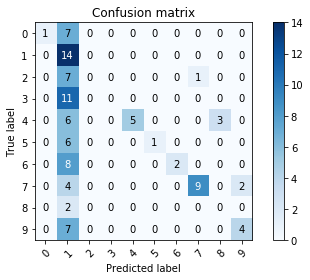

In [227]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

class_names = ['0','1','2','3','4','5','6','7','8','9']

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = [classes[i] for i in unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

  
np.set_printoptions(precision=2)

# y_pred = clf.predict(X_test)

#print (class_names, unique_labels(y_pred,y_test), class_names[])

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, predictions, classes=class_names, title='Confusion matrix')

plt.show()

# Working with CIFAR-10 Dataset

In [228]:
#loading cifar 10 dataset
(x_train, y_train, x_test, y_test)=torch.load('cifar10.pt')

In [229]:
x_train[0].size()

torch.Size([32, 32, 3])

In [230]:
#making 32*32*3 image to 1*3072 dimension feature vector
X_train = []
for i in x_train:
    X_train.append(i.view(1,-1)[0])
X_test = []

for i in x_test:
    X_test.append(i.view(1,-1)[0])

In [231]:
X_test[0]

tensor([158, 112,  49,  ...,  21,  67, 110], dtype=torch.uint8)

In [232]:
#converting 3072 dimension vector to 765 dimension tensor by frequencies of hisograms of R,G,B planes
train_data = []
for i in X_train:
    lis = []
    lis = lis +  list(np.histogram(i[0:1024],[j for j in range(256)])[0])
    lis = lis + list(np.histogram(i[1024:2048],[j for j in range(256)])[0])
    lis = lis + list(np.histogram(i[2048:3072],[j for j in range(256)])[0])
    train_data.append(torch.tensor(lis))
    
test_data = []

for i in X_test:
    lis = []
    lis = lis +  list(np.histogram(i[0:1024],[j for j in range(256)])[0])
    lis = lis + list(np.histogram(i[1024:2048],[j for j in range(256)])[0])
    lis = lis + list(np.histogram(i[2048:3072],[j for j in range(256)])[0])
    test_data.append(torch.tensor(lis))

In [233]:
print(len(train_data))
print(len(test_data))
print(len(train_data[0]))
print(len(test_data[0]))

1000
100
765
765


In [234]:
train_labels = list(y_train.numpy().flatten())
test_labels = list(y_test.numpy().flatten())

In [235]:
# taking value of k from user
k = input("enter the value of k")

enter the value of k3


In [236]:
#predicting labels for test data
predictions = []
for i in range(len(test_data)):
    neighbors_list = neighbors(train_data,test_data[i],int(k),y_train)
    result = response(neighbors_list)
    predictions.append(result)

In [237]:
print(predictions)
print(test_labels)

[6, 8, 0, 1, 6, 5, 2, 9, 2, 3, 8, 9, 9, 1, 2, 2, 8, 1, 9, 6, 1, 0, 3, 1, 2, 1, 9, 9, 9, 9, 5, 6, 0, 8, 3, 1, 6, 9, 3, 7, 0, 3, 1, 4, 7, 9, 1, 2, 4, 2, 1, 1, 6, 3, 9, 8, 8, 6, 2, 3, 8, 6, 4, 9, 6, 6, 0, 2, 9, 9, 2, 7, 8, 8, 0, 2, 3, 9, 6, 9, 0, 1, 1, 0, 0, 7, 9, 0, 0, 2, 2, 6, 0, 9, 2, 3, 1, 8, 0, 9]
[3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 8, 5, 7, 8, 6, 7, 0, 4, 9, 5, 2, 4, 0, 9, 6, 6, 5, 4, 5, 9, 2, 4, 1, 9, 5, 4, 6, 5, 6, 0, 9, 3, 9, 7, 6, 9, 8, 0, 3, 8, 8, 7, 7, 4, 6, 7, 3, 6, 3, 6, 2, 1, 2, 3, 7, 2, 6, 8, 8, 0, 2, 9, 3, 3, 8, 8, 1, 1, 7, 2, 5, 2, 7, 8, 9, 0, 3, 8, 6, 4, 6, 6, 0, 0, 7]


In [238]:
#finding accuracy of predictions
print(accuracy_score(test_labels,predictions)*100)

19.0


Confusion matrix, without normalization
[[3 1 1 0 0 0 1 1 2 1]
 [1 2 1 1 0 0 0 0 0 1]
 [1 2 3 0 0 0 1 0 0 1]
 [0 1 1 1 0 0 4 0 0 3]
 [2 0 2 1 0 0 1 0 0 1]
 [0 1 1 0 0 0 1 2 2 1]
 [0 1 1 3 2 2 3 1 0 3]
 [2 3 0 0 1 0 1 0 2 2]
 [4 1 1 0 0 0 0 0 4 3]
 [0 2 3 3 0 0 0 0 0 3]]


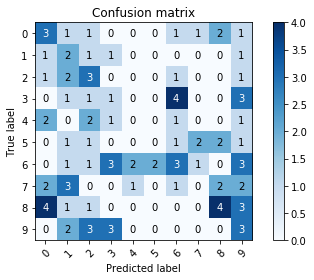

In [239]:
plot_confusion_matrix(y_test, predictions, classes=class_names, title='Confusion matrix')

plt.show()